In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram

In [49]:
# Load the CSV file into a pandas dataframe in chunks
df = pd.read_csv('prescribers-provider-drug/split/MUP_DPR_RY22_P04_V10_DY20_NPIBN_0.csv', chunksize=100_000)

# Load a chunk
ch = next(df)

# Keep only the desired columns and convert total days supply to float
ch = ch[['Prscrbr_NPI', 'Gnrc_Name', 'Tot_Day_Suply']]
ch['Tot_Day_Suply'] = ch['Tot_Day_Suply'].astype(float)

# Count generica occurrences in dataframe
count = ch.groupby(['Gnrc_Name'])['Tot_Day_Suply'].sum() \
    .reset_index().sort_values(by = ['Tot_Day_Suply'], ascending=[False])
display(count)


,Gnrc_Name,Tot_Day_Suply
77,Atorvastatin Calcium,13428069.0
47,Amlodipine Besylate,8908045.0
546,Levothyroxine Sodium,8901703.0
559,Lisinopril,8782054.0
587,Metformin Hcl,7406433.0
...,...,...
89,Aztreonam,43.0
687,Ondansetron Hcl/Pf,20.0
260,Dextrose 5 % In Water,16.0
445,Hepatitis A And B Vaccine/Pf,14.0


In [50]:
# Use pivot_table to handle duplicate index and columns through aggregation
pivot_df = ch.pivot_table(index='Prscrbr_NPI', columns='Gnrc_Name', values='Tot_Day_Suply', aggfunc=sum)
pivot_df = pivot_df.fillna(0)

display(pivot_df[0:5])

Gnrc_Name,0.9 % Sodium Chloride,Abacavir Sulfate,Abacavir Sulfate/Lamivudine,Abacavir/Dolutegravir/Lamivudi,Abaloparatide,Abatacept,Abemaciclib,Abiraterone Acetate,Acalabrutinib,Acamprosate Calcium,...,Warfarin Sodium,"Water For Irrigation,sterile",Zafirlukast,Zaleplon,Zanubrutinib,Zidovudine,Ziprasidone Hcl,Zolmitriptan,Zolpidem Tartrate,Zonisamide
Prscrbr_NPI,,,,,,,,,,,,,,,,,,,,,
1003000126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003000142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003000167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003000423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003000480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(pivot_df)

# Perform hierarchical clustering using cosine similarity
Z = linkage(cosine_sim, method='ward')

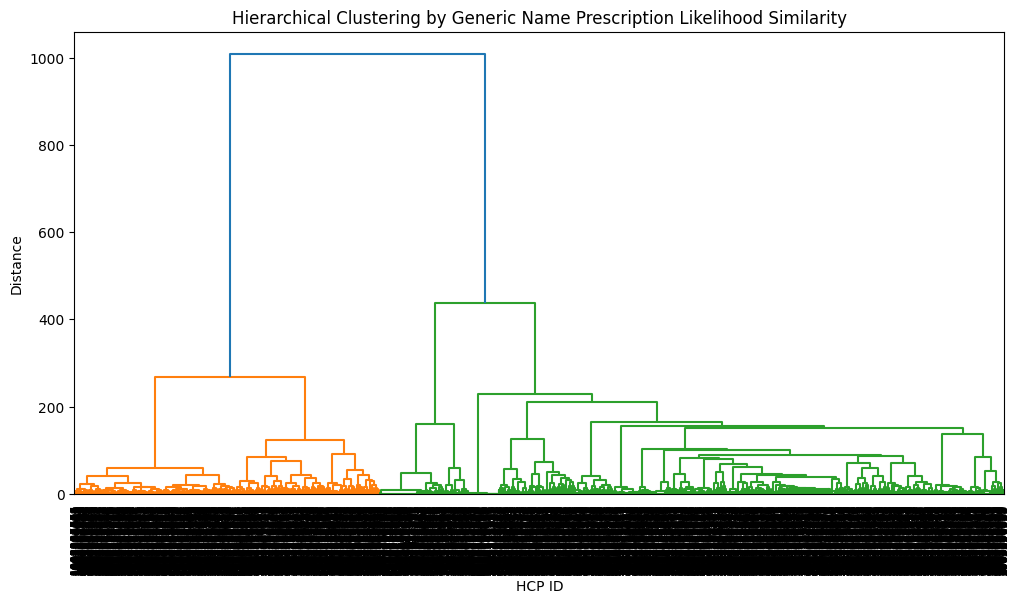

In [52]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering by Generic Name Prescription Likelihood Similarity')
plt.xlabel('HCP ID')
plt.ylabel('Distance')
dendrogram(Z, labels=pivot_df.index, leaf_rotation=90., leaf_font_size=8.)
plt.show()